<a href="https://colab.research.google.com/github/VGuerrero07/Data_Science/blob/master/Projects/Machine_Learning_for_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Credit Default Risk Prediction

One of the metrics that banks and financial institutions care the most is the **DEFAULT RATE** of borrowers. When you lend money to someone, you want that money back, and having many defaults in your loans can lead you to bankruptcy.

<p align="center">
<img src="https://a57.foxnews.com/static.foxbusiness.com/foxbusiness.com/content/uploads/2020/02/931/506/Credible-student-loan-default-iStock-1191453198.jpg?ve=1&tl=1" width="60%">
</p>

So, Artificial Intelligence and Machine Learning have been playing a very important role for these institutions: they offer a way to predict accurately the probability of a loan to end up in default, as well as helping in mitigate the default risk of such a loan (by offering it with higher interest rates, or other conditions).

This Data Science project, created as part of the course ["Data Science na Prática"](https://sigmoidal.ai/curso-online-data-science-na-pratica/) from [Carlos Melo](https://github.com/carlosfab), had the primary goal to create a Machine Learning Model to predict the probability of default from a certain customer, using available data.

## The Project

As said before, this project had the main goal to predict the probability of default from a loan using customer data from NuBank.

It was divided into the following sections:

* Understanding the Problem;

* Getting the Data;

* Analysing the Data;

* Preparing the Data;

* Training and Tuning of Machine Learning Model;

* Testing the Machine Learning Model;

* Conclusion

## Understanding the Problem

### What is Default Rate and why is it so important?

The first part of this project is understanding the problem, and first of all I have to define default, default risk, default rate, and their importance for a business.

According to [Investopedia](https://www.investopedia.com/terms/d/default2.asp), **default** is "*the failure to repay a debt including interest or principal on a loan or security.*": for example when a home buyer fails to make a mortgage payment, or when a corporation or government fails to pay a bond which has reached maturity.

The **default rate**, on the other hand, [is defined as](https://corporatefinanceinstitute.com/resources/knowledge/credit/default-rate/) "the numberof defaulted loans compared to the total number of loans", according to the formula below.

<p align="center">
<img src="https://cdn.corporatefinanceinstitute.com/assets/default-rate1.png" width="60%">
</p>

According to [Corporate Finance](https://corporatefinanceinstitute.com/resources/knowledge/credit/default-rate/), Default rates are important for lending institutions to **measure their risk from borrowers**. If a lending institution finds that they incur a high default rate, it is an important indicator for them to review their lending procedures. A higher default rate leads to a higher rate of risk for the institution. By aiming to lower the default rate, the institution can protect itself from any major losses with borrowers that default, mitigating the **default risk**.

### The Problem

In the problem presented in this project, the primay goal is to use data from a Brazilian Fintech [Nubank](https://nubank.com.br/) to predict the probability from a credit-card customer to become inadimplent in the future.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="180px"></p>

It is important to say that this model has to be used in the moment that the customer requests the credit card, usually in his first contact with the company.

> GOAL: Creating a model that predicts the probability of a customer to become inadimplent.

The expected reslt is that the model can minimize financial losses that may happen to the institution, as well as minimize false positives to avoid customer insatisfaction and lower NPS.

## Getting the Data

In this first step, the data is loaded into a Pandas Dataframe.

Thus, the relevant libraries are installed and imported, and then the data is loaded.

In [ ]:
!pip install scikit-plot -q
!pip install imbalanced-learn -q
!pip install pyproj==1.9.6 -q

In [ ]:
!sudo apt-get install libgeos-3.5.0
!sudo apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Using cached https://files.pythonhosted.org/packages/ca/1f/e9cc2c3fce32e2926581f8b6905831165235464c858ba550b6e9b8ef78c3/pyshp-2.1.2.tar.gz
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756183 sha256=ae9c0f283c324d5b357a86b21490f440da6b848f6cdf111a66110078dddd8926
  Stored in directory: /tmp/pip-ephem-wheel-cache-2flej4u_/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: fil

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# importing pandas, numpy, seaborn and matplotlib libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing other relevant libraries
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# style
sns.set_style('dark')
# random seed
np.random.seed(42)

The data used in this project is available in [this link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). It consists in basically a `csv` file with 45000 inputs and 43 columns, and no more information is provided other than the name of each column.

In [ ]:
# Loading the data and checking the first 5 entries
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


It is already possible to see that our target variable (i.e., the variable whose values are to be modeled and predicted by other variables) is named as `target_default`, and it consists into boolean (True or False) values.

Also, it is possible to see that a lot of variables are coded, probably to guarantee the anonymity of the dataset.

Now that the data is loaded, the first step is concluded.

## Analyzing the Data

In this step, the primary goal for me is to know better the dataset: missing values, type of columns, trends, outliers... everything.

Also, some treatment can also be performed here as well.

To begin with, I must get more information about the columns and their values; for that, I have used the `info()` method.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

Looking at the output above, it is possible to see the type for each column, and to check the amount of missing values. 

It is possible to notice that there are coluns with more than half of its values missing, what has to be trated before using the dataset for training the model.

Also, another great visualization is the number of unique values in each column. For that, the method `nunique()` was chosen.

In [ ]:
# Checking relative amount of missing values
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

In [ ]:
df.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

 We can see that some columns, such as `id`, `profile_phone_number`, and `shipping_zip_code`, with a unique value in each row. Columns with this characteristic usually do not tell anything, and I will disconsider them. It was not the choice with the coluns starting with `score`, since it might represent something relevant for the customer and will be preserved. 

Also, it is possible to notice that there are columns, such as `target_fraud`and `last_amount_borrowed`with many missing values, and also will be disconsidered.

Analyzing the column `email` closer, initially as a matter of curiosity, I have found similar values: gmaill and gmail, and hotmaill and hotmail. It will be treated later, before training.

In [ ]:
df.email.unique()

array(['outlook.com', 'gmail.com', 'spgov.com', 'hotmail.com',
       'hotmaill.com', 'gmaill.com'], dtype=object)

Now, the columns considered to be irrelevant for our problem were put into a list, and dropped from the original dataframe.

In [ ]:
# Select irrelevant columns and deleting them
irrelevant = ['external_data_provider_credit_checks_last_2_year', 'ok_since', 'channel',
        'target_fraud','ids', 'last_amount_borrowed', 'profile_phone_number', 
        'reason', 'zip', 'user_agent', 'job_name', 'external_data_provider_first_name',
        'last_borrowed_in_months', 'state', 'shipping_zip_code','facebook_profile']

df_clean = df.copy()
df_clean.drop(columns=irrelevant, inplace=True)


Another good visualization is the statistical description of the numerical variables. It is great for detecting outliers, as well as for detecting anomalies (negative values, in example). For that, I used the method `describe()`.

In [ ]:
df_clean.describe()

,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,31200.000000,4.443800e+04,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,45000.000000,29876.000000,42767.000000,45000.000000,45000.00
mean,347.983258,100.006797,0.500037,99.925228,0.296717,34381.951154,7.160739e+04,0.076270,0.004569,10.696701,11.068119,247.537000,1.501067,0.503381,12.534781,500.399800,inf
std,110.429165,3.178080,0.288326,10.016549,0.101933,36586.982218,5.185897e+04,0.274052,0.079400,4.592463,4.595501,146.118398,1.114941,0.499997,126.530487,287.968873,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.00
25%,270.000000,97.867036,0.252150,93.198353,0.220000,10000.000000,4.501078e+04,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,11.000000,252.000000,50948.25
50%,340.000000,100.018900,0.500753,99.974796,0.290000,25647.000000,6.126676e+04,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,27.000000,503.000000,101779.00
75%,420.000000,102.141797,0.748816,106.640275,0.360000,47086.750000,8.601923e+04,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,43.000000,747.000000,151337.25
max,990.000000,113.978234,0.999973,142.192400,0.900000,448269.000000,5.000028e+06,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,inf


We can see that there are `inf` values in the column `reported_income`, what may represent a ver high income. As we cannot use these values in our analysis and their quantity is not releavant, they will be disconsidered from it.

Also, it is possible to notice negative values in the column `external_data_provider_email_seen_before`. These values will be replaced by a missing value, as it is not possible to happen in real life.

In [ ]:
# Clean column external_data_provider_email_seen_before negative values
df_clean.loc[df_clean['external_data_provider_email_seen_before'] < 0,
             'external_data_provider_email_seen_before'] = np.nan

# Clean column reported_income inf values
df_clean = df_clean[df_clean['reported_income']!=np.inf]

# Check first 5 entries
df_clean.describe()

,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,44371.000000,44933.000000,44933.000000,44933.000000,44371.000000,31153.000000,4.437100e+04,44236.000000,44359.000000,44371.000000,33408.000000,44933.000000,44933.000000,29825.000000,41411.000000,44933.000000,4.493300e+04
mean,347.998242,100.006035,0.500067,99.928400,0.296739,34379.410651,7.160855e+04,0.076318,0.004576,10.696311,11.067648,247.549106,1.500835,0.503202,28.501678,500.377273,1.032542e+13
std,110.430979,3.178121,0.288301,10.014800,0.101935,36591.596174,5.188392e+04,0.274139,0.079460,4.591854,4.595622,146.125227,1.114867,0.499998,17.705194,287.970677,2.559648e+14
min,0.000000,86.191572,0.000035,60.663039,0.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.030000e+02
25%,270.000000,97.866197,0.252294,93.203107,0.220000,10000.000000,4.501072e+04,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,13.000000,252.000000,5.085600e+04
50%,340.000000,100.017950,0.500808,99.977443,0.290000,25630.000000,6.127855e+04,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,28.000000,503.000000,1.016300e+05
75%,420.000000,102.140578,0.748812,106.644343,0.360000,47085.000000,8.601943e+04,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,44.000000,747.000000,1.511870e+05
max,990.000000,113.978234,0.999973,142.192400,0.900000,448269.000000,5.000028e+06,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,6.355500e+15


After this, it was possible to see 2 columns with possible presence of outliers: `credit_limit` and `reported_income`. So, I used boxplots to have a better visualization of the outliers in these features.

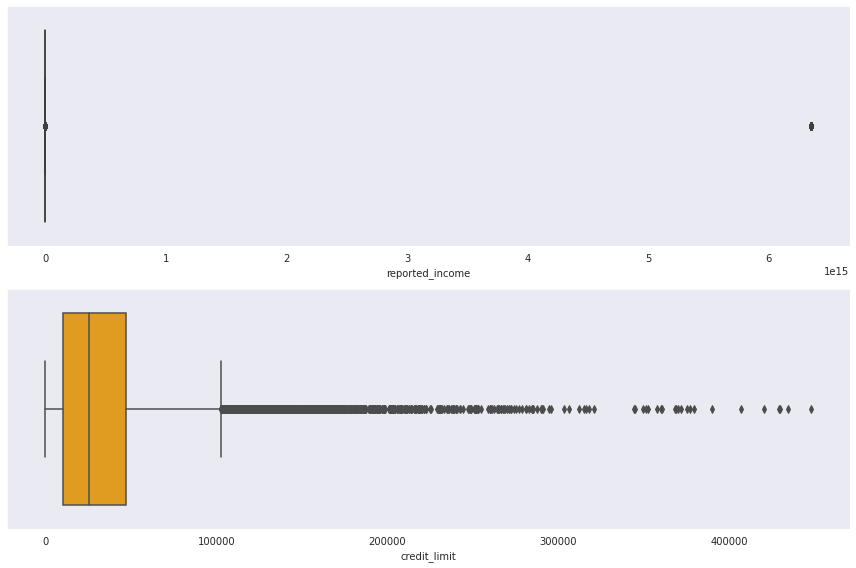

In [ ]:
# Get Boxplots for columns reported_income and credit_limit
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.boxplot(df_clean['reported_income'], ax=ax[0])
sns.boxplot(df_clean['credit_limit'], ax=ax[1], color='orange')

fig.tight_layout()

Here, it was possible to see that the column `credit_limit` has a lot of points outside the upper limit - however, dropping this big amount of points may cause problems with the predictions, so this column will be mantained.

The `reported_income`, on the other hand, has points that are way higher than the upper limit, and this huge difference may cause bigger problems to our model - therefore, it should be treated as soon as possible.

### Cleaning the Data and Feature Engineering

In this section, I made some cleaning in the dataset, including outliers.

Also, it is the moment for **feature engineering** - process of using domain knowledge of the data to create features that make machine learning algorithms work (Source; [Amite Shekar's Medium](https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a)). In other words, it is the process of transforming variables for a better performance of the ML Model.

First of all, I had cleaned the column `reported_income`, using the techniques and concept of IQR score described in [this article](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) from Towards Data Science. Also, I have defined that, if the amount of outliers in this column is superior to 5% of the total number of rows, nothing would be performed - I did not want to lose big amount of data.

Fortunately, the amount was really small and could be disconsidered from the dataset, and it is possible to see that no more outliers, even in the new amount of data form this column, are presented.

In [ ]:
# Deleting outliers from reported_income using IQR
incomeQ1 = df_clean.reported_income.quantile(q=0.25)
incomeQ3 = df_clean.reported_income.quantile(q=0.75)
IQR = incomeQ3 - incomeQ1

max_threshold = incomeQ3 + 1.5*IQR
min_threshold = incomeQ1 - 1.5*IQR

n_rows = df_clean[(df_clean.reported_income < min_threshold)
| (df_clean.reported_income > max_threshold)].shape[0]

print(df_clean.reported_income.isnull().sum())
print(df_clean.shape[0])
print(n_rows)

if n_rows/df_clean.shape[0] < 0.05:
  df_clean = df_clean[((df_clean.reported_income > min_threshold)
& (df_clean.reported_income < max_threshold))| df_clean['reported_income'].isnull()]

print(df_clean.shape[0])

0
44933
340
44593


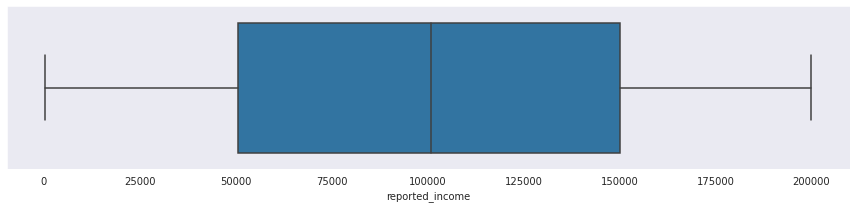

In [ ]:
# Get boxplot from reported_income after cleaning
fig, ax = plt.subplots(figsize=(12, 3))

sns.boxplot(df_clean['reported_income'], ax=ax)

fig.tight_layout()

After that, I have cleaned the dataset.

* Disconsider missing values form our Target Column;
* Transforming similar email values into their real values (gmail and hotmail);
* Fill missing values in columns n_issues and n_accounts to 0; 
* Fill missing values from the other numerical columns with the respective median, using [Simple Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer).
* Fill missing values from categorical columns using the same proportion of the original dataset.

In [ ]:
# Drop NaN values in target variable
df_clean.dropna(subset=['target_default'], inplace=True)

# Cleaning email column
df_clean.loc[df_clean['email'] =='gmaill.com', 'email'] = 'gmail.com'
df_clean.loc[df_clean['email'] =='hotmaill.com', 'email'] = 'hotmail.com'

# Getting numerical columns and filling missing values
num_df = df_clean.select_dtypes(exclude='object').columns

df_clean.n_issues.fillna(value=0, inplace=True)
df_clean.n_accounts.fillna(value=0, inplace=True)

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

In [ ]:
# Getting categorical columns and filling missing values

cat_df = df_clean.select_dtypes(include='object').columns

for col in df_clean[cat_df].iloc[:,1:].columns.tolist():
  percentages = df_clean[col].value_counts(normalize=True).to_dict()
  percent = [percentages[key] for key in percentages]
  labels = [key for key in percentages]

  s = pd.Series(np.random.choice(labels, p=percent, size=df_clean[col].isnull().sum()))
  
  df_clean[col] = df_clean[col].fillna(s)
  if len(df_clean[col].isnull()) > 0:
    df_clean[col].fillna(value=max(percentages, key=percentages.get), inplace=True, axis=0)

That performed, it is possible to se that there iare no more missing values in our dataset, and we can continue to perform some other analyses.

In [ ]:
print(df_clean.isnull().sum())
print("\n")
print(df_clean.dtypes)
print("\n")
print(df_clean.nunique())

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
credit_limit                                       0
income                                             0
real_state                                         0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                         0
n_issues                                           0
application_time_applied                           0
application_time_in_funnel                         0
email                                              0
external_data_provider_credit_checks_last_mont

In [ ]:
df_clean.describe()

,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41359.000000,41359.000000,41359.000000,41359.000000,41359.000000,41359.000000,4.135900e+04,41359.000000,41359.000000,41359.000000,41359.000000,41359.000000,41359.000000,41359.000000,41359.000000,41359.000000,41359.000000
mean,346.549723,100.005532,0.499561,99.921106,0.294497,31161.062090,7.108349e+04,0.076573,0.004642,10.641311,8.143911,247.843396,1.504437,0.670664,28.461810,500.548418,100304.181605
std,110.121207,3.184784,0.288013,10.021434,0.101536,30216.263874,5.235703e+04,0.274683,0.080364,4.588792,6.251866,146.313944,1.114215,0.469978,17.007863,288.004738,57544.493052
min,0.000000,86.191572,0.000035,60.663039,0.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,403.000000
25%,270.000000,97.860168,0.251777,93.187323,0.220000,17326.000000,4.401965e+04,0.000000,0.000000,7.000000,0.000000,120.000000,1.000000,0.000000,14.000000,252.500000,50479.000000
50%,340.000000,100.017950,0.500518,99.976350,0.290000,25213.000000,6.004356e+04,0.000000,0.000000,10.000000,9.000000,248.000000,2.000000,1.000000,28.000000,502.000000,100736.000000
75%,420.000000,102.140251,0.747477,106.631149,0.360000,35000.000000,8.503268e+04,0.000000,0.000000,13.000000,12.000000,375.000000,2.000000,1.000000,43.000000,748.000000,150082.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,448269.000000,5.000028e+06,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,200000.000000


Finally, the last cleaning procedures: column `application_time_applied` involves a datetime column, that probably shows when the customer has applied for NuBank services. The idea was to split the column and get only the hour of application, so we can see later the influence of it in the possibility of default.

Also, I have cleaned the column `profile_tags` and the column `shipping_state`, so they become more user-friendly. 

In [ ]:
df_clean['application_time_applied'] = df_clean['application_time_applied'].str[:2].astype(int)
df_clean.loc[df_clean['application_time_applied'] == 24, 'application_time_applied'] = 0

df_clean['profile_tags'] = df_clean['profile_tags'].str.extract('\[(.*)\]')
df_clean['profile_tags'] = df_clean['profile_tags'].str.replace("'","").str.replace(',', '')

df_clean['shipping_state'] = df_clean['shipping_state'].str[-2:]

df_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,lat_lon,marketing_channel,reported_income,shipping_state,profile_tags
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,7,444.0,outlook.com,2.0,0.0,51.0,645.0,"(-29.151545708122246, -51.1386461804385)",Invite-email,57849.0,MT,n19 n8
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,2,346.0,gmail.com,1.0,0.0,17.0,243.0,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,4902.0,RS,n6 n7 nim
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,25213.0,65023.65,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,0.0,0,6.0,gmail.com,2.0,1.0,9.0,65.0,"(-28.748023890412284, -51.867279334353995)",Waiting-list,163679.0,RR,n0 n17 nim da
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11,406.0,spgov.com,3.0,1.0,38.0,815.0,"(-17.520650158450454, -39.75801139933186)",Waiting-list,1086.0,RN,n4
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,25213.0,60011.29,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,0.0,13,240.0,gmail.com,2.0,1.0,46.0,320.0,"(-16.574259446978008, -39.90990074785962)",Invite-email,198618.0,MT,pro+aty n19 da b19


### Graphic Analysis

Now, it is time to use graphics and charts for a better visualiation of what we have.

First of all, I have checked the numerical variables distribution, using histograms.

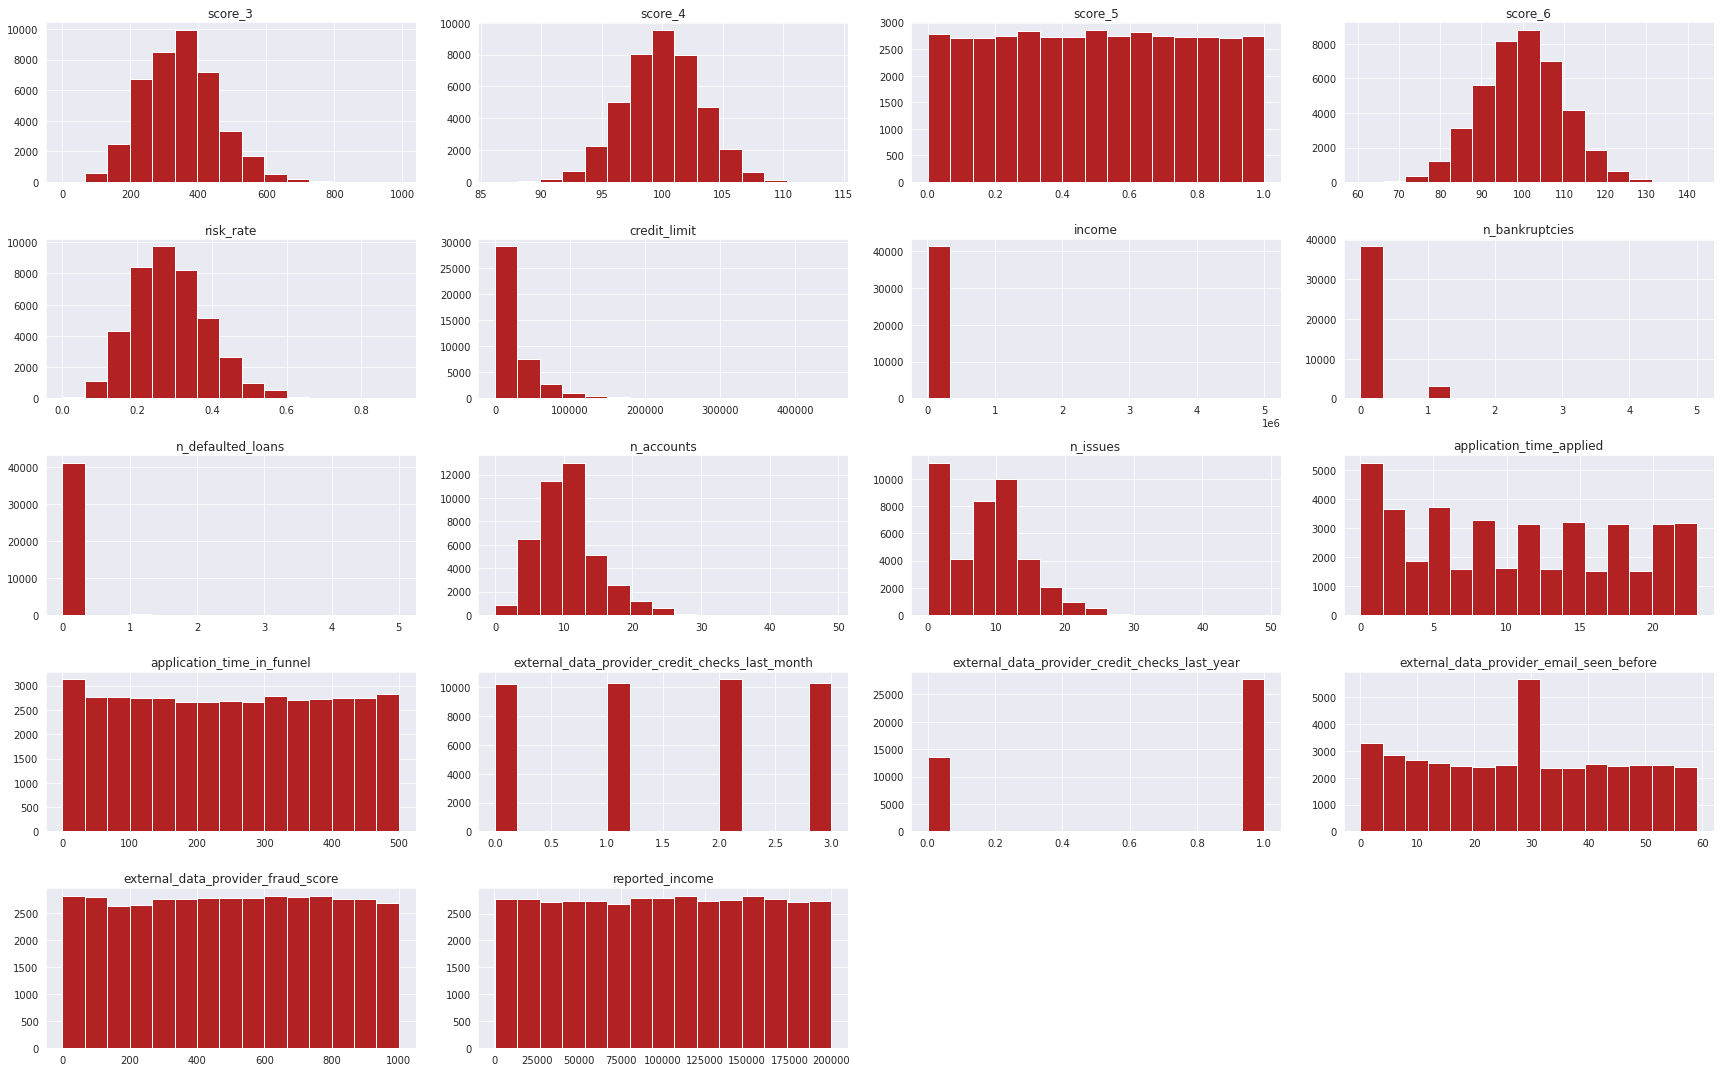

In [ ]:
# Get different type of columns
binary_var = df_clean.select_dtypes(include=['object', 'bool']).nunique()[df_clean.nunique() == 2].keys().tolist()
num_cols = [col for col in df_clean.select_dtypes(exclude=['object', 'bool']).columns.tolist()]
cat_cols = [col for col in df_clean.select_dtypes(include=['object', 'bool']).columns.tolist() if col not in num_cols+binary_var]

# Plotting histograms for numerical variables
df_clean[num_cols].hist(bins=15, figsize=(24, 15), color='firebrick')
plt.tight_layout()
plt.show()

It is possible to see that they were evenly distributed, apart from binary variables.

Then, it was time to [encode](https://towardsdatascience.com/beginners-guide-to-encoding-data-5515da7f56ab) binary data, since most of Machine Learning models do not handle categorical data correctly.

For Binary variables (`target_default` and `facebook_profile`), the choice was [LabelEncoder](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621). 

In [ ]:
# Encoding Binary data in new Dataframe
df_enc = df_clean.copy()
l_encod = LabelEncoder()

for col in binary_var:
  df_enc[col+'_encoded'] = l_encod.fit_transform(df_enc[col])
  df_enc.drop(col, axis=1, inplace=True)
  if col == 'target_default':
    df_enc.rename(columns={'target_default_encoded':col}, inplace=True)
    
df_enc.head()

,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,lat_lon,marketing_channel,reported_income,shipping_state,profile_tags,target_default
0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,7,444.0,outlook.com,2.0,0.0,51.0,645.0,"(-29.151545708122246, -51.1386461804385)",Invite-email,57849.0,MT,n19 n8,0
1,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,2,346.0,gmail.com,1.0,0.0,17.0,243.0,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,4902.0,RS,n6 n7 nim,0
2,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,25213.0,65023.65,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,0.0,0,6.0,gmail.com,2.0,1.0,9.0,65.0,"(-28.748023890412284, -51.867279334353995)",Waiting-list,163679.0,RR,n0 n17 nim da,1
3,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11,406.0,spgov.com,3.0,1.0,38.0,815.0,"(-17.520650158450454, -39.75801139933186)",Waiting-list,1086.0,RN,n4,0
4,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,25213.0,60011.29,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,0.0,13,240.0,gmail.com,2.0,1.0,46.0,320.0,"(-16.574259446978008, -39.90990074785962)",Invite-email,198618.0,MT,pro+aty n19 da b19,0


After encoding, some other graphic analysis are made.

The first one is the impact of State in Default, and the second is the impact of the application hour in the result.

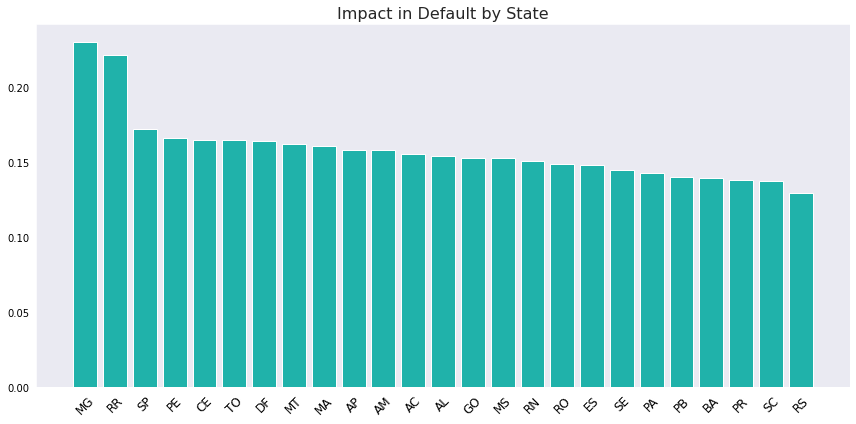

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
group = df_enc.groupby('shipping_state').target_default.mean().sort_values(ascending=False)
ax.bar(group.index, group, color='lightseagreen')
ax.set_xlabel('')
ax.set_xticklabels(group.index, rotation=45, fontsize=12, color='black')
ax.tick_params(colors='black')
ax.set_title('Impact in Default by State', fontsize=16)

plt.tight_layout()

Here, we can see that Minas Gerais (MG) is the state with more impact in the reults of default r not, followed by Roraima (RR). Also, we can see that people from south of Brazil (Rio Grande do Sul (RS), Santa Catarina (SC) and Paraná (PR)) are the states with less probability of a customer to not pay the loan. 

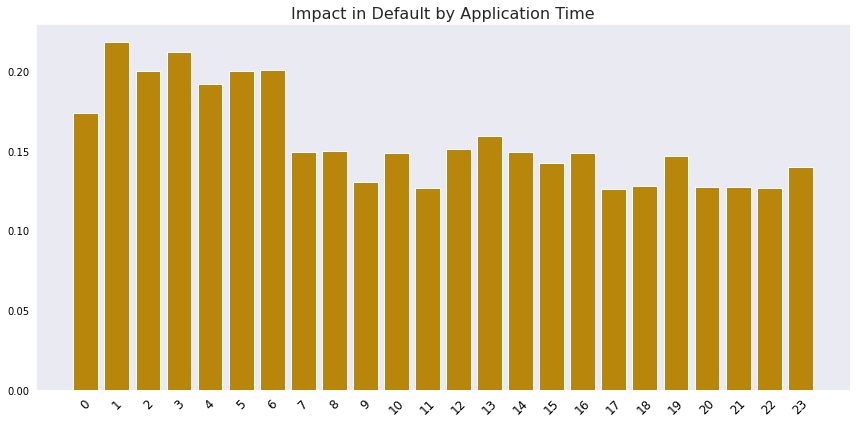

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

group = df_enc.groupby('application_time_applied').target_default.mean().sort_index()
ax.bar(group.index, group, color='darkgoldenrod')
ax.set_xlabel('')
ax.set_xticks(range(0, 24))
ax.set_xticklabels(group.index, rotation=45, fontsize=12, color='black')
ax.tick_params(colors='black')
ax.set_title('Impact in Default by Application Time', fontsize=16)

plt.tight_layout()

In this last chart, I noticed a trend: the impact of hour in the target variable is way higher when the application hour is 6 or earlier; therefore, a new column was created to represent aplication during overnight.

In [ ]:
# Creating overnight column
df_enc['overnight'] = df_enc['application_time_applied'].apply(lambda x: 1 if x <= 6 else 0)
df_enc['application_time_applied'] = df_enc['application_time_applied'].astype(str)

Also, scatter plots are very useful to analyse trends and the impact in the target variable. However,  scatter plots only work with numerical columns.

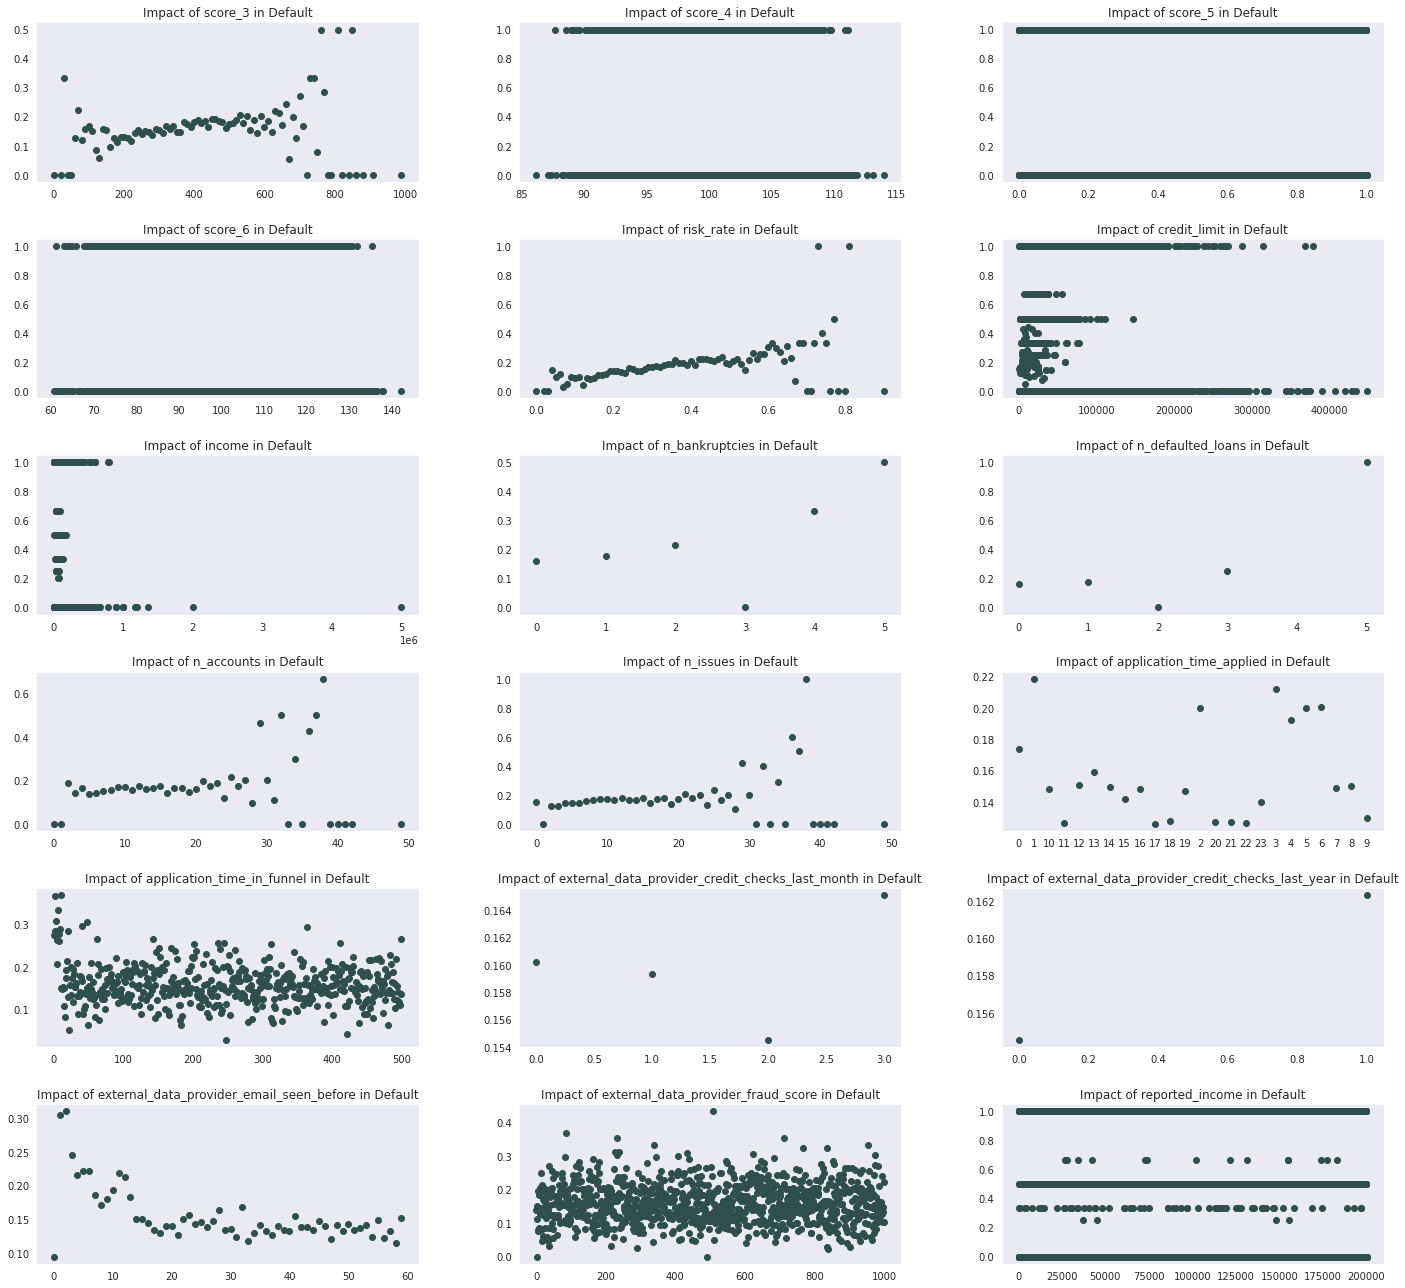

In [ ]:
# Plotting scatter plots
fig = plt.figure(figsize=(20, 18))

for i in num_cols:
  group = df_enc.groupby(df_enc[i]).target_default.mean()
  ax = fig.add_subplot(6, 3, num_cols.index(i)+1)
  ax.scatter(group.index, group, color='darkslategray')
  ax.set_xlabel('')
  ax.set_title(f'Impact of {i} in Default')

plt.tight_layout()

Finally, there is a column representing the latitude and longitude, as a tuple. A nice visualization that I can create is a map with the places in Brazil with cases of default.

For that, I used `Basemap` library, and data from [GADM Database](https://gadm.org/download_country.html) to draw Brazilian states correctly (in `Basemap` they are very out of date).

In [ ]:
# Create function to draw states correctly
def drawstates(ax, shapefile='/content/gadm36_BRA_1'):
        shp = m.readshapefile(shapefile, 'states', drawbounds=True)
        for nshape, seg in enumerate(m.states):
            poly = Polygon(seg, facecolor='navajowhite', edgecolor='darkgoldenrod')
            ax.add_patch(poly)

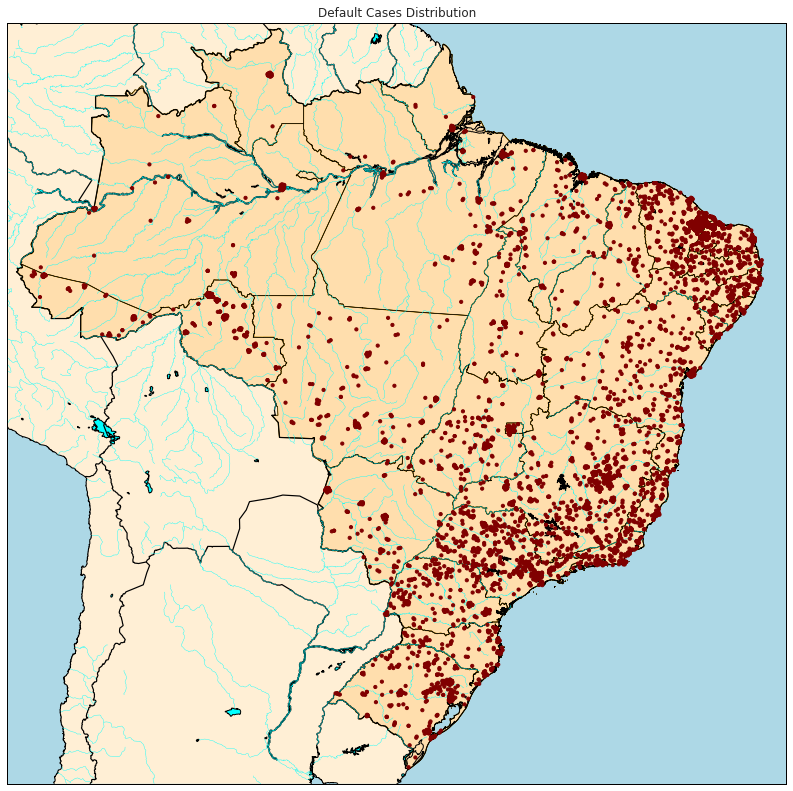

In [ ]:
# Splititing Tuple into 2 different columns
df_enc['latitude'] = df_enc['lat_lon'].str.split(',').str[0].str.replace('(', '').astype(float)
df_enc['longitude'] = df_enc['lat_lon'].str.split(',').str[1].str.replace(')', '').astype(float)

lat_lon = df_enc[df_enc['target_default'] == 1]

# Plotting Basemap
fig, ax = plt.subplots(figsize=(16,14))

m = Basemap(projection='cyl', resolution='h', llcrnrlat=-34.5, urcrnrlat=5.57, 
            llcrnrlon=-74.5, urcrnrlon=-33.47, ax=ax)

m.drawmapboundary(fill_color='lightblue')
m.drawcoastlines()
m.fillcontinents(color='papayawhip', lake_color='aqua')
m.drawcountries(color='black', linewidth=1.2)
drawstates(m.ax)
m.drawrivers(color='aqua', linewidth=.4)

m.scatter(lat_lon['longitude'], lat_lon['latitude'], s=10, zorder=2, latlon=True, c=lat_lon['target_default'], cmap=plt.get_cmap('jet_r'))

plt.title('Default Cases Distribution')
plt.show()

We can see the predominance of default cases in Brazilian Southeast and Northeast regions, speciall in Rio de Janeiro, São Paulo and Ceará states.

Now, all the visualizations are over, with many insights and good conclusions. It is time to clea the other columns, encode the remaining categorical variables, so it is possible to prepare the data for testing.

* As no useful information could be taken from latitude and longitude, I decided to disconsider them;
* The column `profile_tags`is cleaned, in a way that I split and create a unique column for each tag;
* Use of `get_dummies()`to get dummy variables for other categorical columns

In [ ]:
# Dropping columns of latitude and longitude
df_enc = df_enc.drop(columns=['latitude', "longitude", 'lat_lon'])

In [ ]:
# Cleaning profile tags
# Transforming each profile tag in a list
df_enc['profile_tags'] = df_enc['profile_tags'].str.split()

# Creating a list of unique tags
tags_unique = []
for tags in df_enc['profile_tags']:
    for tag in tags:
        tags_unique.append(tag)

tags_unique = list(set(tags_unique))

# creating columns
for tag in tags_unique:
    df_enc[tag] = df_enc['profile_tags'].apply(lambda x: 1 if tag in x else 0)

# Discarding column Profile Tags
df_enc.drop('profile_tags', axis=1, inplace=True)

df_enc.head()

,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,target_default,overnight,n19,n5,n12,dfa,n7,a15,n3,n16,n1,n8,n4,n6,n17,c55,pro+aty,nim,n18,b19,c1,n2,aty,n0,n10,n15,n14,n9,da,n11,n13
0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,7,444.0,outlook.com,2.0,0.0,51.0,645.0,Invite-email,57849.0,MT,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,2,346.0,gmail.com,1.0,0.0,17.0,243.0,Radio-commercial,4902.0,RS,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,25213.0,65023.65,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,0.0,0,6.0,gmail.com,2.0,1.0,9.0,65.0,Waiting-list,163679.0,RR,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11,406.0,spgov.com,3.0,1.0,38.0,815.0,Waiting-list,1086.0,RN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,25213.0,60011.29,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,0.0,13,240.0,gmail.com,2.0,1.0,46.0,320.0,Invite-email,198618.0,MT,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
binary_var = df_enc.select_dtypes(include=['object', 'bool']).nunique()[df_enc.nunique() == 2].keys().tolist()
num_cols = [col for col in df_enc.select_dtypes(exclude=['object', 'bool']).columns.tolist()]
cat_cols = [col for col in df_enc.select_dtypes(include=['object', 'bool']).columns.tolist() if col not in num_cols+binary_var]
df_enc = pd.get_dummies(df_enc, columns=cat_cols)

df_enc.head()

,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,target_default,overnight,n19,n5,n12,dfa,n7,a15,n3,n16,n1,n8,n4,n6,n17,c55,pro+aty,nim,n18,b19,c1,n2,aty,...,application_time_applied_8,application_time_applied_9,email_gmail.com,email_hotmail.com,email_outlook.com,email_spgov.com,marketing_channel_Facebook,marketing_channel_Instagram,marketing_channel_Invite-email,marketing_channel_Invite-web,marketing_channel_LinkedIn,marketing_channel_Radio-commercial,marketing_channel_Twitter,marketing_channel_Waiting-list,marketing_channel_Website,shipping_state_AC,shipping_state_AL,shipping_state_AM,shipping_state_AP,shipping_state_BA,shipping_state_CE,shipping_state_DF,shipping_state_ES,shipping_state_GO,shipping_state_MA,shipping_state_MG,shipping_state_MS,shipping_state_MT,shipping_state_PA,shipping_state_PB,shipping_state_PE,shipping_state_PR,shipping_state_RN,shipping_state_RO,shipping_state_RR,shipping_state_RS,shipping_state_SC,shipping_state_SE,shipping_state_SP,shipping_state_TO
0,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,0.0,0.0,18.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,0.0,0.0,14.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,360.0,100.027073,0.351918,112.892453,0.29,25213.0,65023.65,0.0,0.0,10.0,0.0,6.0,2.0,1.0,9.0,65.0,163679.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,1.0,0.0,19.0,19.0,406.0,3.0,1.0,38.0,815.0,1086.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,500.0,98.474289,0.532539,118.126207,0.18,25213.0,60011.29,0.0,0.0,11.0,0.0,240.0,2.0,1.0,46.0,320.0,198618.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


With the step of Analysis finished, it was time to prepare the data for our model to train.

## Preparing the data for training

In order to train a Machine Learning model, you have to split your dataset into train and tests sets.

However, it is important to check before doing so if you have a balanced dataset, or else your model might [overfit](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) and will not perform well when used in unknown data.

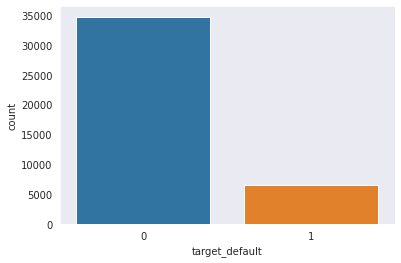

Number of ocurrences

0    34752
1     6607
Name: target_default, dtype: int64

Number of relative ocurrences

0    0.840252
1    0.159748
Name: target_default, dtype: float64


In [ ]:
# Separating target variable form the other variables
X = df_enc.drop('target_default', axis=1)
y = df_enc['target_default']

# Checking if the dataset is balanced
sns.countplot(y)
plt.show()

print("Number of ocurrences\n")
print(y.value_counts())
print("\nNumber of relative ocurrences\n")
print(y.value_counts()/y.shape[0])

As stated in the plot above, the dataset is imbalanced: there are only 15% of entries of one class, and 84% of the other.

For oversampling method, I have chosen the sklearn utils `resample()` ([check documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)) method. Also, I am going to compare the performances for 3 different datasets: using over- and undersampling, only undersampling, and no samping strategy at all.

For Undersampling, I have chosen the RandomUnderSampler class.

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

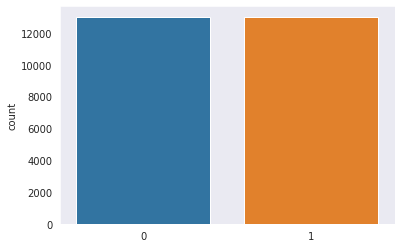

Number of ocurrences

13023
13023

Number of relative ocurrences

0.5
0.5


In [ ]:
# Using both sampling methods

# Oversampling using resample()
df_train = pd.merge(y_train, X_train, left_on=y_train.index, right_on=X_train.index)
df_train = df_train.set_index('key_0')

minority = df_train[df_train['target_default']==1]
majority = df_train[df_train['target_default']==0]

minority_balanced = resample(minority, replace=True, n_samples=majority.shape[0]//2)

df_train_balanced = pd.concat([majority, minority_balanced])
X_train_balanced = df_train_balanced.drop('target_default', axis=1)
y_train_balanced = df_train_balanced['target_default']

# Undersampling using RandomUnderSampler()
rus = RandomUnderSampler()
X_train_both, y_train_both = rus.fit_sample(X_train_balanced, y_train_balanced)

sns.countplot(y_train_both)
plt.show()

print("Number of ocurrences\n")
print(y_train_both.tolist().count(0))
print(y_train_both.tolist().count(1))
print("\nNumber of relative ocurrences\n")
print(y_train_both.tolist().count(0)/y_train_both.shape[0])
print(y_train_both.tolist().count(1)/y_train_both.shape[0])

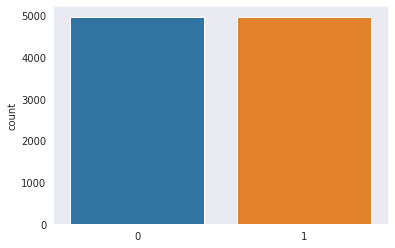

Number of ocurrences

4973
4973

Number of relative ocurrences

0.5
0.5


In [ ]:
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

sns.countplot(y_train_rus)
plt.show()

print("Number of ocurrences\n")
print(y_train_rus.tolist().count(0))
print(y_train_rus.tolist().count(1))
print("\nNumber of relative ocurrences\n")
print(y_train_rus.tolist().count(0)/y_train_rus.shape[0])
print(y_train_rus.tolist().count(1)/y_train_rus.shape[0])

Now that the dataset is balanced, there are no missing values, and all columns are numerical, it is possible to choose the best model and to train it.

## Training and Tuning the Machine Learning Model

First, I created a function that uses [cross validation](https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f) to get the mean value of a performance metric. In this case, I decided to use the **Area under ROC Curve**, or [ROC AUC Score](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc), according to what is stated in this [article](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/) from Machine Learning Mastery.

<p align='center'>

<img src='https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/12/How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png' width='70%'>

</p>

To read more about Cross Validation and performance scores, click the links above!

In [ ]:
# Create the function
def val_score(X, y, model, score, printing=True):
    """
    Performs cross validation for a determined model, given the target y and the inputs X.

    X: entries for the model;
    y: target values for each entry;
    model: Scikit-learn machine learning model, like Random Forest, Logistic Regression, Linear Regression, etc.
    score: String. Performance Metric for the Machine Learning Model, e.g:
        - 'precision'
        - 'f1'
        - 'recall'
        - 'roc_auc'
    printing: True if printing recall score, False otherwise
    """

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), model)
    scores = cross_val_score(pipeline, X, y, scoring=score).mean()
    if printing == True:
        print(f"{capitalize(score)}: {scores.mean():.2f} (+/- {scores.std():.2f})")
    
    return scores.mean()


### Both Sampling Methods

Here, we can see the results for the Model using both Oversampling and Undersampling.

In [ ]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()


model = []
metric = []
# evaluate recall as performance score - UNDERSAMPLING ONLY
for clf in (rf, dt, sgdc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    metric.append(val_score(X_train_both, y_train_both, clf, 'roc_auc', printing=False))

pd.DataFrame(data=metric, index=model, columns=['ROC_AUC'])

,ROC_AUC
RandomForestClassifier,0.959041
DecisionTreeClassifier,0.819012
SGDClassifier,0.655989
LogisticRegression,0.698302
XGBClassifier,0.720005
LGBMClassifier,0.803605


We can see that the best performance, by far, is from Random Forest Classifier, and I have chosen it as the model for this balancing strategy.

Now, I want to tune the parameters and achieve the best possible results for the chosen algorithm. the parameters chosen were:

* `max_depth`
* `n_estimators`
* `max_features`
* `min_samples_split`
* `min_samples_leaf`
* `bootstrap`
* `min_impurity_decrease`

In [ ]:
# Scaling the train set
std = StandardScaler()
std.fit(X_train_both)
X_train_both_std = std.transform(X_train_both)

In [ ]:
# Instantiate Model
rfc = RandomForestClassifier()

# Defining parameters to be tuned
param_grid = {
    'max_depth':[i for i in range(1,8,1)]
}

# Identifying Best Parameters
kfold = StratifiedKFold(n_splits=7, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_both_std, y_train_both)

# Getting Results
print("Best result: {:.2f} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best result: 0.72 for {'max_depth': 7}


In [ ]:
# Instantiate Model
rfc = RandomForestClassifier(max_depth=7)

# Defining parameters to be tuned
param_grid = {
    'n_estimators':[i for i in range(50,501,50)]
}

# Identifying Best Parameters
kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_both_std, y_train_both)

# Getting Results
print("Best result: {:.2f} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best result: 0.72 for {'n_estimators': 500}


In [ ]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=7)

param_grid = {
    'max_features':[i for i in range(1,7)]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_both_std, y_train_both)

print("Best result: {:.2f} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best result: 0.75 for {'max_features': 1}


In [ ]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=7, max_features=1)

param_grid = {
    'min_samples_split':[i for i in range(2,6,1)]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_both_std, y_train_both)

print("Best result: {:.2f} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best result: 0.75 for {'min_samples_split': 2}


In [ ]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=7, max_features=1,
                             min_samples_split=2)

param_grid = {
    'min_samples_leaf':[i for i in range(1,4,1)]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_both_std, y_train_both)

print("Best result: {:.2f} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best result: 0.75 for {'min_samples_leaf': 1}


In [ ]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=7, max_features=1,
                             min_samples_split=2, min_samples_leaf=1)

param_grid = {
    'bootstrap':[True, False]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_both_std, y_train_both)

print("Best result: {:.2f} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best result: 0.75 for {'bootstrap': False}


In [ ]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=7, max_features=1,
                             min_samples_split=2, min_samples_leaf=1,
                             bootstrap=False)

param_grid = {
    'min_impurity_decrease': [i/10 for i in range(0,6,1)]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(rfc, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_both_std, y_train_both)

print("Best result: {:.2f} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best result: 0.75 for {'min_impurity_decrease': 0.0}


The parameter `max_depth` is, by default, equal to `None`, representing the biggest depth possible in the tree. Here, I decided to select between a range lower than the default value to prevent overfitting.

With all parameters tuned, it was time to fit the model and predict according to our test set.

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      8706
           1       0.26      0.59      0.36      1634

    accuracy                           0.67     10340
   macro avg       0.58      0.64      0.57     10340
weighted avg       0.80      0.67      0.71     10340

AUC: 0.6373



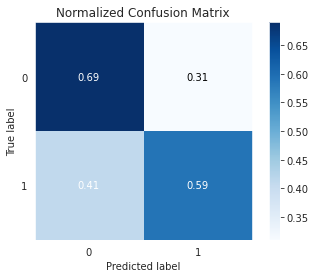

In [ ]:
# Tuned Model
rfc = RandomForestClassifier(n_estimators=500, max_depth=7, max_features=1,
                             min_samples_split=2, min_samples_leaf=1,
                             bootstrap=False, min_impurity_decrease=0)

rfc.fit(X_train_both_std, y_train_both)

# Scaling test set
X_test_std = std.transform(X_test)

# Predicting
y_pred = rfc.predict(X_test_std)

# Classification Report
print(classification_report(y_test, y_pred))

# Print AUC for ROC curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

Here we can see that the model did not perform so well if compared to the train set. It shows the importance of always getting the best model for your **TEST SET**, as you always want to use what you created in new, unknown data and want it to give the best result possible. IT DOES NOT MATTER IF YOUR MODEL CAN ONLY PERFORM WELL WITH THE SPECIFIC TRAINING DATASET.

### Under Sampling Only

Then, I decided to use only Undersampled data to train the model. For that, I used the same steps as the last section, but choosing another model.

In [ ]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()


model = []
metric = []
# evaluate recall as performance score - UNDERSAMPLING ONLY
for clf in (rf, dt, sgdc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    metric.append(val_score(X_train_rus, y_train_rus, clf, 'roc_auc', printing=False))

pd.DataFrame(data=metric, index=model, columns=['ROC_AUC'])

,ROC_AUC
RandomForestClassifier,0.671170
DecisionTreeClassifier,0.559721
SGDClassifier,0.618170
LogisticRegression,0.683472
XGBClassifier,0.689916
LGBMClassifier,0.674718


Here, I decided to go with the XGBoost Classifier, since it showed the best data for the Area under ROC Curve.

Afterwise, it was time to tune the model's hyperparameters. I have chosen the following:

* `n_estimators`

* `max_depth`

* `min_child_weight`

* `gamma`

* `learning_rate`

In [ ]:
# Scaling the training set
std2 = StandardScaler()
std2.fit(X_train_rus)
X_train_rus_std = std2.transform(X_train_rus)

In [ ]:
# Instantiate Model
xgb = XGBClassifier()

# Define Parameters to tune
param_grid = {
 'n_estimators':range(350,1000,50),
}

# identify Best Parameters
kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus_std, y_train_rus)

# Getting Results
print("Best: {:.2f} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.68 for {'n_estimators': 350}


In [ ]:
xgb = XGBClassifier(n_estimators=350)

param_grid = {
  'max_depth':range(1,6,1),
  'min_child_weight':range(1,6,1)
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus_std, y_train_rus)

print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.69 for {'max_depth': 1, 'min_child_weight': 5}


In [ ]:
xgb = XGBClassifier(n_estimators=350, max_depth=1, min_child_weight=5)

param_grid = {
    'gamma':[i/10 for i in range(1,10)]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus_std, y_train_rus)

print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.69 for {'gamma': 0.1}


In [ ]:
xgb = XGBClassifier(n_estimators=350, max_depth=1, min_child_weight=5,
                    gamma=0.1)

param_grid = {
    'learning_rate':[0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.3, 0.5, 0.7, 1]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus_std, y_train_rus)

print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.69 for {'learning_rate': 0.07}


              precision    recall  f1-score   support

           0       0.91      0.67      0.77      8706
           1       0.27      0.64      0.38      1634

    accuracy                           0.67     10340
   macro avg       0.59      0.66      0.58     10340
weighted avg       0.81      0.67      0.71     10340

AUC: 0.6567



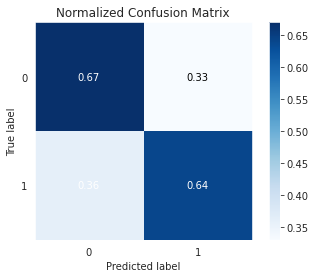

In [ ]:
# Tuned Model
xgb = XGBClassifier(n_estimators=350, max_depth=1, min_child_weight=5,
                    gamma=0.1, learning_rate=)

xgb.fit(X_train_rus_std, y_train_rus)

# Scaling test set
X_test_std = std2.transform(X_test)

# Predicting
y_pred = xgb.predict(X_test_std)

# Classification Report
print(classification_report(y_test, y_pred))

# Print AUC for ROC curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

We can see that the result was similar to the one found using both sampling strategies. One conclusion that one may have is that the training size matters, but is not so determinant for the success of the model.

### No Sampling Strategy

In this [article](https://machinelearningmastery.com/xgboost-for-imbalanced-classification/), from Machine Learning Mastery, there is a really nice strategy to handle imbalanced data using XGBoost Classifier. It led me to the [official model's documentation](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html), and there I found 2 interesting sections: "Control Overfitting" and "Handle Imbalanced Dataset".

So, I also have decided to use XGBoost and a training dataset without any sampling strategy, and use the parameter `scale_pos_weight` to handle teh datasets imbalance.

Also, just for a matter of curiosity, I used the function again and I got the expected result: XGBoost had the best result for the imbalanced dataset.

In [ ]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()


model = []
metric = []
# evaluate recall as performance score - UNDERSAMPLING ONLY
for clf in (rf, dt, sgdc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    metric.append(val_score(X_train, y_train, clf, 'roc_auc', printing=False))

pd.DataFrame(data=metric, index=model, columns=['ROC_AUC'])

,ROC_AUC
RandomForestClassifier,0.678372
DecisionTreeClassifier,0.534881
SGDClassifier,0.595529
LogisticRegression,0.694070
XGBClassifier,0.698972
LGBMClassifier,0.686826


Using the XGBoost Classifier, I decided to run again the tuning of hyperparameters, but using the recommended value of `scale_pos_weight`. Also, i decided to tune 2 other parameters: `colsample_bytree` and `subsample`.

In [ ]:
std3 = StandardScaler()
std3.fit(X_train)
X_train_std = std3.transform(X_train)

In [ ]:
# scale_pos_weight (spw) = total_negative_examples / total_positive_examples
spw = round(y_train.tolist().count(0)/y_train.tolist().count(1))

In [ ]:
# Instantiate models
xgb = XGBClassifier(scale_pos_weight=spw)

# Setting parameter grid
param_grid = {
 'n_estimators':range(500, 901, 100)
}

# Identifying the best parameters
kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_std, y_train)

# Getting Best results
print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.69 for {'n_estimators': 500}


In [ ]:
xgb = XGBClassifier(scale_pos_weight=spw, n_estimators=500)

param_grid = {
    'max_depth': range(1,6),
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.70 for {'max_depth': 1}


In [ ]:
xgb = XGBClassifier(scale_pos_weight=spw, n_estimators=500, max_depth=1)

param_grid = {
    'min_child_weight': range(1,6,1),
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.70 for {'min_child_weight': 5}


In [ ]:
xgb = XGBClassifier(scale_pos_weight=spw, n_estimators=500, max_depth=1,
                    min_child_weight=5)

param_grid = {
    'gamma':[i/10 for i in range(0,10)]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.70 for {'gamma': 0.0}


In [ ]:
xgb = XGBClassifier(scale_pos_weight=spw, n_estimators=500, max_depth=1,
                    min_child_weight=5, gamma=0)

param_grid = {
    'subsample':[i/10.0 for i in range(5,10)],
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.70 for {'subsample': 0.9}


In [ ]:
xgb = XGBClassifier(scale_pos_weight=spw, n_estimators=500, max_depth=1,
                    min_child_weight=5, gamma=0, subsample=0.9)

param_grid = {
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.70 for {'colsample_bytree': 0.8}


In [ ]:
xgb = XGBClassifier(scale_pos_weight=spw, n_estimators=400, max_depth=1,
                    min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.8)

param_grid = {
    'learning_rate':[0.001, 0.003, 0.005, 0.007, 0.01, 0.05, 0.1]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_:.2f} for {grid_result.best_params_}")

Best: 0.70 for {'learning_rate': 0.1}


              precision    recall  f1-score   support

           0       0.91      0.68      0.78      8706
           1       0.27      0.62      0.37      1634

    accuracy                           0.67     10340
   macro avg       0.59      0.65      0.57     10340
weighted avg       0.80      0.67      0.71     10340

AUC: 0.6509



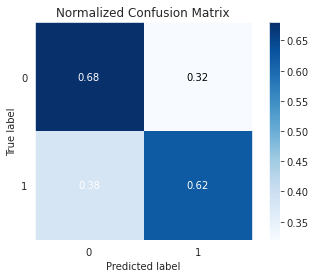

In [ ]:
# Tuned Model
xgb = XGBClassifier(scale_pos_weight=spw, n_estimators=500, max_depth=1,
                    min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.8,
                    learning_rate=0.1)

xgb.fit(X_train_std, y_train)

# Scaling test set
X_test_std = std3.transform(X_test)

# Predicting
y_pred = xgb.predict(X_test_std)

# Classification Report
print(classification_report(y_test, y_pred))

# Print AUC for ROC curve
print(f"AUC: {roc_auc_score(y_test, y_pred):.4f}\n")

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

We can see that, comparing AUC ROC for this case and the obtained using both sampling strategies, this model was slighly better. If compared to Undersampling, both models performed very similarly..

## Conclusion

This problem is considered a "multiobjective optimization" problem, as the goal is to minimize false positives and maximize true positives.

This project was really challenging, specially to tune parameters and avoid overfitting. 

The results obtained from 3 Sampling Strategies were close to each other; however, the strategy of "over + undersampling" had the worst result.

Also, it showed me that it does not matter how the model perform in the training data: what matters is how well it predicts the results from data it has never faced before. This situation happened with the first model tested: even though the AUC ROC obtained were mor ethan 0.95, the results from test set were way lower.

The suggestions I make for next projects using the same dataset is to use different feature engineering ideas, other models, and other parameters.